In [ ]:
#pip install langgraph langsmith

In [ ]:
#pip install langchain langchain_groq langchain_community

In [1]:
groq_api_key='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'
langsmith='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'

In [2]:
from langchain_groq import ChatGroq

In [3]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x00000243CE4A64E0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x00000243CE3F3B60>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [4]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [5]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [6]:
graph_builder

In [7]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [8]:
graph_builder.add_node("chatbot",chatbot)

In [9]:
graph_builder

In [10]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [11]:
graph=graph_builder.compile()

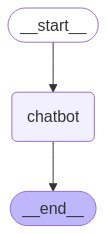

In [12]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [13]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

dict_values([{'messages': AIMessage(content="##  Databricks: The Unified Data and AI Platform\n\nDatabricks is a leading platform for **unified data and AI**, offering a collaborative, scalable, and secure environment for data engineering, data science, and machine learning. \n\n**Here's a breakdown:**\n\n**Core Features:**\n\n* **Lakehouse Architecture:** Combines the best of data lakes and data warehouses, enabling efficient storage, processing, and analysis of structured, semi-structured, and unstructured data.\n* **Spark-Based Engine:** Leverages Apache Spark, a powerful open-source engine for distributed data processing, providing high performance and scalability.\n* **Data Engineering Tools:** Includes tools for data ingestion, transformation, and management, enabling efficient data pipelines and workflows.\n* **Data Science and Machine Learning:** Offers a suite of tools and libraries for data exploration, model development, and deployment, empowering data scientists to build an

KeyboardInterrupt: Interrupted by user